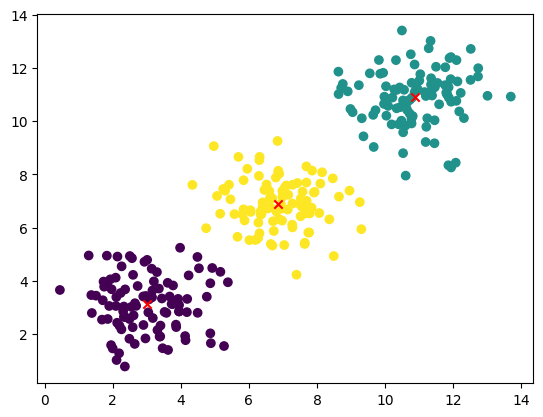

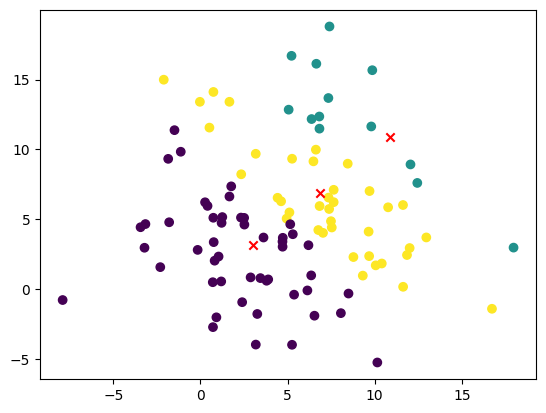

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# 生成样本数据
np.random.seed(0)
cluster1 = np.random.normal(3, 1, (100, 2))
cluster2 = np.random.normal(7, 1, (100, 2))
cluster3 = np.random.normal(11, 1, (100, 2))
X = np.concatenate((cluster1, cluster2, cluster3), axis=0)

# 随机初始化质心
np.random.shuffle(X)
initial_centers = X[:8]

# 计算每个样本到质心的距离
def distance(X, centers):
    dist = np.sqrt(np.sum((X[:, np.newaxis] - centers) ** 2, axis=-1))
    return dist

# 重新计算质心
def update_centers(X, labels, k):
    centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centers

# k-means 主函数
def kmeans(X, k, max_iter=100):
    centers = initial_centers
    for i in range(max_iter):
        dist = distance(X, centers)
        labels = np.argmin(dist, axis=-1)
        centers = update_centers(X, labels, k)
    return labels, centers

# 训练模型
labels, centers = kmeans(X, 3)

# 画出结果
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.show()


# 现在我们来开始做预测
def predict(X, centers):
    dist = np.sqrt(np.sum((X[:, np.newaxis] - centers) ** 2, axis=-1))
    return np.argmin(dist, axis=-1)

# 生成新的数据
X_new = np.random.normal(5, 5, (100, 2))
predictions = predict(X_new, centers)

# 画出结果
plt.scatter(X_new[:, 0], X_new[:, 1], c=predictions)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
plt.show()